<a href="https://colab.research.google.com/github/Viswonathan06/Titanic-Dataset/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Dataset**

### **Using PANDAS and MATPLOTLIB to evaluate and figure out the specifics of the Titanic dataset and draw some obvious conclusions dervied from the result of our code**.




In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv")

# **Basic overview of the data**


---


First we take a look at the head, i.e the first five rows of data. This gives us the basic overview and tells us the different columns that are present.

The [x:y] function gives us values from x to y-1.



---

Information not obvious:

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [32]:
df.head()

#can also be done by 
#df[0:5]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Beginning our analysis

Let's start off small and get a basic statistical overview. (some values here may or may not make sense, but let's see anyway.)

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that there are a total of 891 passengers taken into account in this database. The mean for the columns PassengerId, Pclass make no sense, so we shall ignore those. 

* We see that the mean of age is about 29.7 years, which means most of the people on board were middle-aged adults. 

* Mean fare was \$32.20 which means that there were a lot of people with tickets in the lower class comparatively. Maximum fare was \$512.33.

Rest of the data will be made clear as we move along.


Now let's take a look at the number of people who survived the sinking of Titanic.


In [34]:
df.groupby('Survived').count()[['PassengerId']]

,PassengerId
Survived,
0,549
1,342


Here we see that, the number of people who survived are 549 and number of peeople who died are 342.


---

Now let's analyse the following:
Amongst the number of survivors,
* how many had family on board and,
* what class in the boat did they reside.


---

First let's take a look at how many people were there in the various classes of the boat.





In [35]:
df.groupby('Pclass').count()[['PassengerId']]

,PassengerId
Pclass,
1,216
2,184
3,491


We notice that maximum people resided in third class as suspected above by looking at the mean fare


---

Now lets take a look at the survival numbers based on class


In [36]:
df.groupby(['Survived', 'Pclass']).count()[['PassengerId']]

PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119

Here we see that, amongst the people that **did not** survive, 80 were in the 1st class while 372 were in the third class. 

We notice that amongst the people in third class, with total of 491 people, 372 were dead and only 119 were alive. 

It was not the case in first class however, where 80 out of 216 died and 136 people were alive. 

Let's take a look at the number of male and female passengers.

In [37]:
df.groupby('Sex').count()[['PassengerId']]

,PassengerId
Sex,
female,314
male,577




Now let's look at the male to female ratio of the survivors and dead people.

In [38]:
df.groupby(['Survived', 'Sex']).count()[['PassengerId']]

PassengerId
Survived Sex                
0        female           81
         male            468
1        female          233
         male            109

As we know that the women and children were evacuated first, the number of male deaths were staggeringly high as compared to the female. As a result, number of male survivers also were less compared to that over female. 

* 468/577 dead males
* 81/314 dead females

Let's analyse how many people were under the age of 18.

In [39]:
df[df.Age <= 18].count()[['PassengerId']]

PassengerId    139
dtype: int64

139 people were under or of the age 18 i.e children. 


---

How many of these children survived the sinking?

In [40]:
df[df.Age <= 18].groupby('Survived').count()[['PassengerId']]

,PassengerId
Survived,
0,69
1,70


Sadly, about half the children did not make it out of the boat. 



---

Youngest person to die?


In [41]:
#df.sort_values(by = 'Age',ascending= True)[['Survived','Age']]
dead = df[df.Survived == 0].sort_values(by = 'Age')
dead = dead[dead['Age'].notnull()] ## Here we choose the rows which dont have age as NULL to check the eldest recorded person. 
dead
# dead = df[df.Survived == 0]
# dead[dead.Age.min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...,...
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


Here we see that, according to this dataset, youngest person to die on the ship was 1 year old. and eldest person to die, that we have a record of, is 74 years old. 



---

---

We shall now see some graphical representations of the above data using matplotlib. 

# Matplotlib and Seaborn




In [42]:
import seaborn as sns

Plotting the different features of the dataset against their frequency to get a visual idea.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


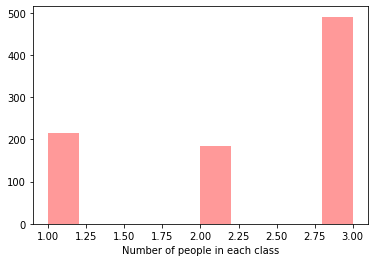

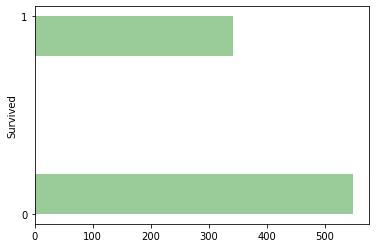

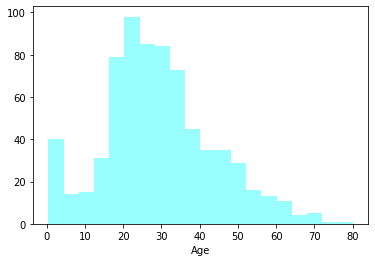

In [43]:
sns.distplot(df["Pclass"], kde = False, color = "red", axlabel = "Number of people in each class")
plt.show()
sns.distplot(df.Survived, vertical = True, kde= False, color="green", label= " Number of suvivors and deaths ")
plt.yticks([0,1])
plt.show()
sns.distplot(df.Age, vertical = False, kde= False, color="cyan")
plt.show()


We get a visual representation of the data which coincides with the conclusions we made previously from analysing the dataset.

---

To get a better idea, we use countplots.

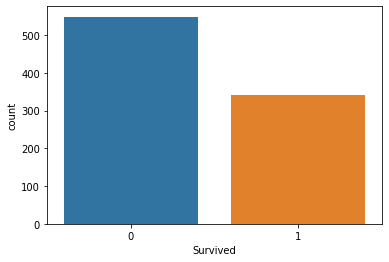

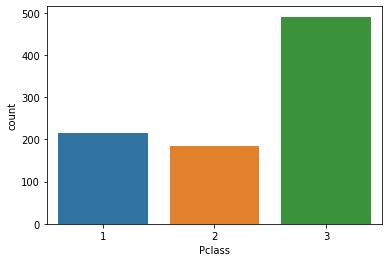

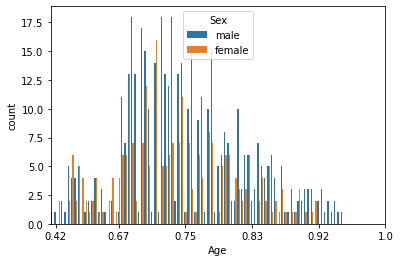

In [44]:
sns.countplot( x='Survived', data= df)
plt.show()
sns.countplot( x='Pclass', data= df)
plt.show()
sns.countplot( x='Age', data= df, hue= 'Sex')
plt.xticks([1, 20, 40, 60, 80, 100])
plt.show()

Plotting the age and fare with the hue applied for sex where males are blue and females are while, we see that most of the cheaper seats were filled with many more males than females, while as the price increased, we see an increase in number of females than males. 

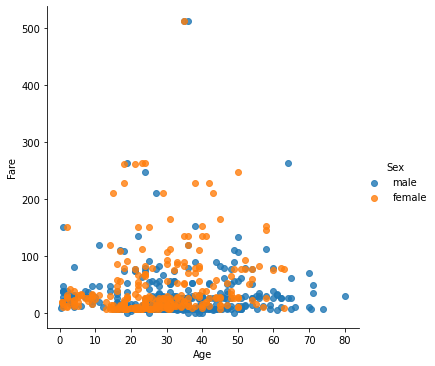

In [45]:
sns.lmplot( x = 'Age', y = 'Fare', data = df, fit_reg= False, hue='Sex')

Plotting the age and fare with the hue applied for survived where death are blue and survivals are while, we see that most of the cheaper seats ended up dead, while as the price increased, we see an that number of survivors were more compared to deaths.

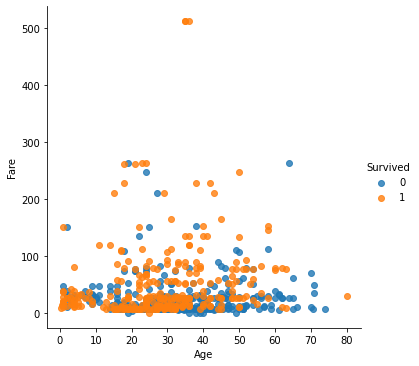

In [46]:
sns.lmplot( x = 'Age', y = 'Fare', data = df, fit_reg= False, hue='Survived')

Let's look at the boxplots of a few of the features/data.

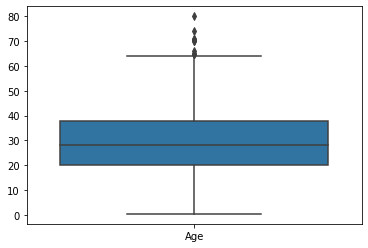

In [47]:
sns.boxplot(data = df.loc[:,["Age"]])

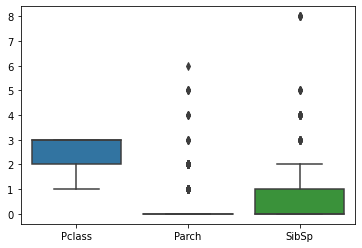

In [48]:
sns.boxplot(data = df.loc[:,["Pclass", "Parch", "SibSp"]])
plt.show()

<function matplotlib.pyplot.show>

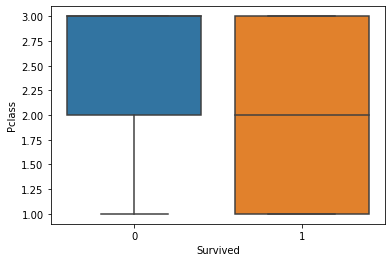

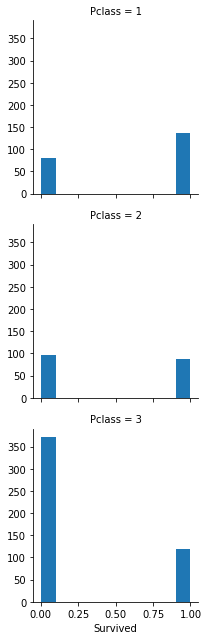

In [49]:
sns.boxplot( x = df.Survived, y = df.Pclass )
g = sns.FacetGrid(df , row= "Pclass")
g = g.map(plt.hist, "Survived")
plt.show

<function matplotlib.pyplot.show>

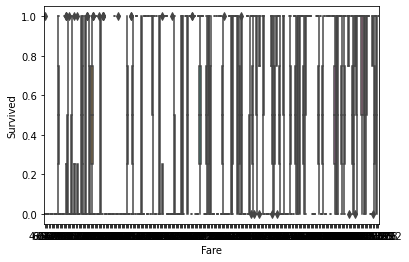

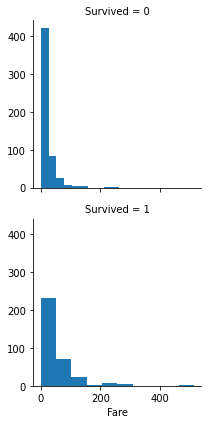

In [50]:
sns.boxplot( x = df.Fare, y = df.Survived )
g = sns.FacetGrid(df , row= "Survived")
g = g.map(plt.hist, "Fare")
plt.show

In [134]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from IPython.display import clear_output


In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
dataset = df
temp = df
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
dataset = dataset[dataset["Age"].notnull() & dataset["Cabin"].notnull() & dataset["Embarked"].notnull()]
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


In [122]:
#dataset = dataset.drop(['Name','Ticket','PassengerId'], axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


In [123]:
y = dataset.Survived
x = dataset.drop("Survived", axis = 1)

In [124]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,female,38.0,1,0,71.2833,C85,C
3,1,female,35.0,1,0,53.1000,C123,S
6,1,male,54.0,0,0,51.8625,E46,S
10,3,female,4.0,1,1,16.7000,G6,S
11,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,D35,S
872,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,female,56.0,0,1,83.1583,C50,C
887,1,female,19.0,0,0,30.0000,B42,S


In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
262,1,male,52.0,1,1,79.65,E67,S
252,1,male,62.0,0,0,26.55,C87,S
245,1,male,44.0,2,0,90.00,C78,Q
789,1,male,46.0,0,0,79.20,B82 B84,C
712,1,male,48.0,1,0,52.00,C126,S


In [126]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(146, 8)
(146,)
(37, 8)
(37,)


In [127]:
CATEGORICAL_COLUMNS = ["Sex", "SibSp", "Parch", "Pclass", "Cabin", "Embarked"]
NUMERICAL_COLUMNS = ["Age", "Fare"]

In [128]:
feature_columns= []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = x_train[feature_name].unique()
  feature_columns.append( tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERICAL_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = float))

print(feature_columns)

[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='SibSp', vocabulary_list=(1, 0, 2, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Parch', vocabulary_list=(1, 0, 2, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(1, 3, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Cabin', vocabulary_list=('E67', 'C87', 'C78', 'B82 B84', 'C126', 'B50', 'C46', 'F G73', 'C148', 'B96 B98', 'E10', 'B18', 'D9', 'A31', 'D49', 'E38', 'C30', 'D10 D12', 'B51 B53 B55', 'B35', 'D', 'B20', 'C65', 'B19', 'C93', 'C54', 'G6', 'D33', 'F2', 'C101', 'A10', 'D36', 'E36', 'D11', 'C23 C25 C27', 'E24', 'E25', 'F4', 'A16', 'C70', 'A6', 'D7', 'E121', 'D26', 'A34', 'E33', 'C45', 'C92', 'A36', 'A26', 'D6', 'E40', 'C83', 'E77', 'B3', 'D35', 'B

In [176]:
def make_input_fn(data_df, label_df, num_epochs=700, shuffle=True, batch_size=8):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(x_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)


In [177]:
linear_est = tf.estimator.LinearClassifier(feature_columns= feature_columns, optimizer=tf.keras.optimizers.Ftrl(
      learning_rate=0.0025,
      l2_regularization_strength=0.1
    ))

linear_est.train(train_input_fn)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0k7wa5vg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0k7wa5vg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 349.167
INFO:tensorflow:loss = 0.46738774, step = 100 (0.288 sec)
INFO:tensorflow:global_step/sec: 872.948
INFO:tensorflow:loss = 0.6295783, step = 200 (0.114 sec)
INFO:tensorflow:global_step/sec: 860.402
INFO:tensorflow:loss = 0.6838109, step = 300 (0.116 sec)
INFO:tensorflow:global_step/sec: 800.342
INFO:tensorflow:loss = 0.6597968, step = 400 (0.125 sec)
INFO:tensorflow:global_step/sec: 846.498
INFO:tensorflow:loss = 0.38490224, step = 500 (0.118 sec)
INFO:tensorflow:global_step/sec: 860.9

In [179]:
result = linear_est.evaluate(eval_input_fn)
clear_output()
print(result["accuracy"])

0.7297297


In [185]:
result = list(linear_est.predict(eval_input_fn))
print(x_train.iloc[12])
print(y_train.iloc[12])
print(result[12]["probabilities"][1])

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0k7wa5vg/model.ckpt-13300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Pclass            1
Sex          female
Age              21
SibSp             0
Parch             0
Fare        77.9583
Cabin            D9
Embarked          S
Name: 627, dtype: object
1
0.8317993
